model2 accuracy 64% train 62% validation

In [4]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
import tensorflow as tf
print(tf.test.gpu_device_name());
print("CPU count : ",os.cpu_count());
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import librosa
import csv
from tensorflow import keras

/device:GPU:0
CPU count :  12


#### Preparing dataset

importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import librosa
import csv

training dataset
each audio file is classified as covid/not_covid

In [3]:
train_csv = pd.read_csv('Kaggle dataset\cough_trial_extended.csv')
train_csv

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid
...,...,...
165,-bZrDCS8KAg_ 70.000_ 80.000.wav,not_covid
166,-ej81N6Aqo4_ 0.000_ 8.000.wav,not_covid
167,-gvLnl1smfs_ 90.000_ 100.000.wav,not_covid
168,-hu5q-Nn4BM_ 70.000_ 80.000.wav,not_covid


In [4]:
train_csv['class'].unique()
tot_rows = train_csv.shape[0]

Creating spectrograms for each audio file

In [14]:
cmap = plt.get_cmap('inferno')
for i in range(tot_rows) :
    source = train_csv['file_properties'][i] # name of the audio file
    filename = 'Kaggle dataset/trial_covid/'+source
    y,sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    plt.savefig(f'spectrograms/{source[:-3].replace(".", "")}.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>


Extracting features from Spectrogram¶

Features :

    Mel-frequency cepstral coefficients (MFCC)(20 in number)
    Spectral Centroid,
    Zero Crossing Rate
    Chroma Frequencies
    Spectral Roll-off.

In [ ]:
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
header

writing to csv file

In [6]:
file = open('data_new_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
    print("row ",i)
    source = train_csv['file_properties'][i]
    file_name = 'Kaggle dataset/trial_covid/'+source
    y,sr = librosa.load(file_name, mono=True, duration=5)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += ' '+train_csv['class'][i]
    to_append = to_append.split()
    file = open('data_new_extended.csv', 'a')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append)
    

row  0
row  1
row  2
row  3
row  4
row  5
row  6
row  7
row  8
row  9
row  10
row  11
row  12
row  13
row  14
row  15
row  16
row  17
row  18
row  19
row  20
row  21
row  22
row  23
row  24
row  25
row  26
row  27
row  28
row  29
row  30
row  31
row  32
row  33
row  34
row  35
row  36
row  37
row  38
row  39
row  40
row  41
row  42
row  43
row  44
row  45
row  46
row  47
row  48
row  49
row  50
row  51
row  52
row  53
row  54
row  55
row  56
row  57
row  58
row  59
row  60
row  61
row  62
row  63
row  64
row  65
row  66
row  67
row  68
row  69
row  70
row  71
row  72
row  73
row  74
row  75
row  76
row  77
row  78
row  79
row  80
row  81
row  82
row  83
row  84
row  85
row  86
row  87
row  88
row  89
row  90
row  91
row  92
row  93
row  94
row  95
row  96
row  97
row  98
row  99
row  100
row  101
row  102
row  103
row  104
row  105
row  106
row  107
row  108
row  109
row  110
row  111
row  112
row  113
row  114
row  115
row  116
row  117
row  118
row  119
row  120
row  121
row  122
row

In [6]:
data = pd.read_csv('data_new_extended.csv')
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.520202,0.045849,1613.207268,1412.419947,2908.029175,0.107019,-377.008667,110.928284,-31.870615,6.640702,...,-7.442677,-1.042071,-0.211678,-3.513029,-1.755283,-3.029743,-2.873752,-2.084186,-4.006258,not_covid
1,0.535920,0.001767,2892.900310,2467.700044,5074.209595,0.148584,-519.298096,60.833210,-13.686949,52.106445,...,-0.897269,7.246154,-1.711321,3.879874,3.637301,3.026381,2.439105,2.778507,2.209200,not_covid
2,0.495701,0.033442,3429.345493,2788.624737,6887.833659,0.225315,-282.546631,48.550930,-15.530038,12.706840,...,-6.072834,-4.181358,0.995803,-0.526877,0.544948,-8.846842,-2.909317,-1.115006,-5.921741,not_covid
3,0.407945,0.013446,2710.614836,2664.172992,5778.325399,0.142076,-346.925842,75.774315,-7.640137,11.369929,...,5.065131,-0.284327,0.986260,-2.453420,3.691722,2.317096,-2.061888,-4.779807,-0.513034,not_covid
4,0.413932,0.059003,1545.106644,1403.070020,2853.684400,0.130244,-340.659760,104.258057,-32.329517,-13.514756,...,-8.156581,0.851374,-5.614543,-6.410962,-0.998022,-1.892213,-2.441887,-3.758770,-3.492306,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.494002,0.005091,1601.517754,2301.426512,3662.638346,0.047815,-543.939331,119.115051,23.888491,23.672983,...,-1.247695,-2.640601,1.630950,0.660486,1.616748,-2.473058,0.665920,-5.397944,-1.299975,not_covid
166,0.400460,0.052107,2664.429265,2563.518673,5518.431600,0.121514,-290.961487,85.464661,-10.990861,10.985048,...,-4.628566,-7.416304,-4.506893,-7.480810,-4.860178,-6.334512,-5.011344,-8.423484,-0.845706,not_covid
167,0.704503,0.058540,3090.063144,2740.902776,6531.090291,0.179077,-75.817581,68.875961,-11.661060,17.179529,...,0.688080,-7.519141,0.608991,-6.631441,0.658447,-4.130286,0.720673,-4.663277,-0.649811,not_covid
168,0.424427,0.044151,3174.170083,2482.889460,5768.206787,0.221743,-264.292847,58.730362,-7.444155,15.067248,...,-0.634892,0.677984,-3.650386,-6.033737,1.209816,-14.924580,-11.188300,-8.857522,-5.092669,not_covid


In [7]:
data.shape

(170, 27)

Encoding labels

1 is not_covid
0 is covid

In [8]:
genre_list = data.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

Scaling features

all columns except the last

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:,:-1],dtype=float))

train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
print(X_train.shape)
print(y_train.shape)

(113, 26)
(113,)


113

#### Classification Model using Tensorflow

In [4]:
from tensorflow import keras
from keras import models
from keras import layers


In [31]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               13824     
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
 dense_35 (Dense)            (None, 2)                 22        
                                                                 
Total params: 186,976
Trainable params: 186,976
Non-tr

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

In [34]:
y_predict = model.predict(X_test)

In [37]:
preds = []
for prediction in y_predict :
    preds.append(np.argmax(prediction))

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

1.0

In [12]:
import pandas as pd
import numpy as np
model = keras.models.load_model("Models/model1.h5")
df = pd.read_csv('data_new_extended.csv')
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.520202,0.045849,1613.207268,1412.419947,2908.029175,0.107019,-377.008667,110.928284,-31.870615,6.640702,...,-7.442677,-1.042071,-0.211678,-3.513029,-1.755283,-3.029743,-2.873752,-2.084186,-4.006258,not_covid
1,0.535920,0.001767,2892.900310,2467.700044,5074.209595,0.148584,-519.298096,60.833210,-13.686949,52.106445,...,-0.897269,7.246154,-1.711321,3.879874,3.637301,3.026381,2.439105,2.778507,2.209200,not_covid
2,0.495701,0.033442,3429.345493,2788.624737,6887.833659,0.225315,-282.546631,48.550930,-15.530038,12.706840,...,-6.072834,-4.181358,0.995803,-0.526877,0.544948,-8.846842,-2.909317,-1.115006,-5.921741,not_covid
3,0.407945,0.013446,2710.614836,2664.172992,5778.325399,0.142076,-346.925842,75.774315,-7.640137,11.369929,...,5.065131,-0.284327,0.986260,-2.453420,3.691722,2.317096,-2.061888,-4.779807,-0.513034,not_covid
4,0.413932,0.059003,1545.106644,1403.070020,2853.684400,0.130244,-340.659760,104.258057,-32.329517,-13.514756,...,-8.156581,0.851374,-5.614543,-6.410962,-0.998022,-1.892213,-2.441887,-3.758770,-3.492306,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.494002,0.005091,1601.517754,2301.426512,3662.638346,0.047815,-543.939331,119.115051,23.888491,23.672983,...,-1.247695,-2.640601,1.630950,0.660486,1.616748,-2.473058,0.665920,-5.397944,-1.299975,not_covid
166,0.400460,0.052107,2664.429265,2563.518673,5518.431600,0.121514,-290.961487,85.464661,-10.990861,10.985048,...,-4.628566,-7.416304,-4.506893,-7.480810,-4.860178,-6.334512,-5.011344,-8.423484,-0.845706,not_covid
167,0.704503,0.058540,3090.063144,2740.902776,6531.090291,0.179077,-75.817581,68.875961,-11.661060,17.179529,...,0.688080,-7.519141,0.608991,-6.631441,0.658447,-4.130286,0.720673,-4.663277,-0.649811,not_covid
168,0.424427,0.044151,3174.170083,2482.889460,5768.206787,0.221743,-264.292847,58.730362,-7.444155,15.067248,...,-0.634892,0.677984,-3.650386,-6.033737,1.209816,-14.924580,-11.188300,-8.857522,-5.092669,not_covid


In [36]:
x_test = [1,0.4111254215240478, 0.0625184699892997, 2568.055370120989, 2120.785846909021, 4942.667643229167, 0.194446705005787, -341.9399719238281, 48.36978149414063, 1, 1, -16.181291580200195, 26.65470123291016, -12.134271621704102, -15.391576766967772, -22.64920997619629, -10.553547859191896, -14.65562343597412, -13.17125415802002, -4.308652400970459, -12.13412094116211, 1, -9.484455108642578, 1, -12.544062614440918, -14.754064559936523, -5.850820064544678]
x_test = x_test[:-1]
print(x_test)
print(model.predict([x_test]))

[1, 0.4111254215240478, 0.0625184699892997, 2568.055370120989, 2120.785846909021, 4942.667643229167, 0.194446705005787, -341.9399719238281, 48.36978149414063, 1, 1, -16.181291580200195, 26.65470123291016, -12.134271621704102, -15.391576766967772, -22.64920997619629, -10.553547859191896, -14.65562343597412, -13.17125415802002, -4.308652400970459, -12.13412094116211, 1, -9.484455108642578, 1, -12.544062614440918, -14.754064559936523]
[[0. 1.]]


In [35]:
df = pd.read_csv("data_new_extended.csv")
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.520202,0.045849,1613.207268,1412.419947,2908.029175,0.107019,-377.008667,110.928284,-31.870615,6.640702,...,-7.442677,-1.042071,-0.211678,-3.513029,-1.755283,-3.029743,-2.873752,-2.084186,-4.006258,not_covid
1,0.535920,0.001767,2892.900310,2467.700044,5074.209595,0.148584,-519.298096,60.833210,-13.686949,52.106445,...,-0.897269,7.246154,-1.711321,3.879874,3.637301,3.026381,2.439105,2.778507,2.209200,not_covid
2,0.495701,0.033442,3429.345493,2788.624737,6887.833659,0.225315,-282.546631,48.550930,-15.530038,12.706840,...,-6.072834,-4.181358,0.995803,-0.526877,0.544948,-8.846842,-2.909317,-1.115006,-5.921741,not_covid
3,0.407945,0.013446,2710.614836,2664.172992,5778.325399,0.142076,-346.925842,75.774315,-7.640137,11.369929,...,5.065131,-0.284327,0.986260,-2.453420,3.691722,2.317096,-2.061888,-4.779807,-0.513034,not_covid
4,0.413932,0.059003,1545.106644,1403.070020,2853.684400,0.130244,-340.659760,104.258057,-32.329517,-13.514756,...,-8.156581,0.851374,-5.614543,-6.410962,-0.998022,-1.892213,-2.441887,-3.758770,-3.492306,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.494002,0.005091,1601.517754,2301.426512,3662.638346,0.047815,-543.939331,119.115051,23.888491,23.672983,...,-1.247695,-2.640601,1.630950,0.660486,1.616748,-2.473058,0.665920,-5.397944,-1.299975,not_covid
166,0.400460,0.052107,2664.429265,2563.518673,5518.431600,0.121514,-290.961487,85.464661,-10.990861,10.985048,...,-4.628566,-7.416304,-4.506893,-7.480810,-4.860178,-6.334512,-5.011344,-8.423484,-0.845706,not_covid
167,0.704503,0.058540,3090.063144,2740.902776,6531.090291,0.179077,-75.817581,68.875961,-11.661060,17.179529,...,0.688080,-7.519141,0.608991,-6.631441,0.658447,-4.130286,0.720673,-4.663277,-0.649811,not_covid
168,0.424427,0.044151,3174.170083,2482.889460,5768.206787,0.221743,-264.292847,58.730362,-7.444155,15.067248,...,-0.634892,0.677984,-3.650386,-6.033737,1.209816,-14.924580,-11.188300,-8.857522,-5.092669,not_covid


In [36]:
df['label'] = df['label'].map({'not_covid' : 0,'covid':1})

In [37]:
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.520202,0.045849,1613.207268,1412.419947,2908.029175,0.107019,-377.008667,110.928284,-31.870615,6.640702,...,-7.442677,-1.042071,-0.211678,-3.513029,-1.755283,-3.029743,-2.873752,-2.084186,-4.006258,0
1,0.535920,0.001767,2892.900310,2467.700044,5074.209595,0.148584,-519.298096,60.833210,-13.686949,52.106445,...,-0.897269,7.246154,-1.711321,3.879874,3.637301,3.026381,2.439105,2.778507,2.209200,0
2,0.495701,0.033442,3429.345493,2788.624737,6887.833659,0.225315,-282.546631,48.550930,-15.530038,12.706840,...,-6.072834,-4.181358,0.995803,-0.526877,0.544948,-8.846842,-2.909317,-1.115006,-5.921741,0
3,0.407945,0.013446,2710.614836,2664.172992,5778.325399,0.142076,-346.925842,75.774315,-7.640137,11.369929,...,5.065131,-0.284327,0.986260,-2.453420,3.691722,2.317096,-2.061888,-4.779807,-0.513034,0
4,0.413932,0.059003,1545.106644,1403.070020,2853.684400,0.130244,-340.659760,104.258057,-32.329517,-13.514756,...,-8.156581,0.851374,-5.614543,-6.410962,-0.998022,-1.892213,-2.441887,-3.758770,-3.492306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.494002,0.005091,1601.517754,2301.426512,3662.638346,0.047815,-543.939331,119.115051,23.888491,23.672983,...,-1.247695,-2.640601,1.630950,0.660486,1.616748,-2.473058,0.665920,-5.397944,-1.299975,0
166,0.400460,0.052107,2664.429265,2563.518673,5518.431600,0.121514,-290.961487,85.464661,-10.990861,10.985048,...,-4.628566,-7.416304,-4.506893,-7.480810,-4.860178,-6.334512,-5.011344,-8.423484,-0.845706,0
167,0.704503,0.058540,3090.063144,2740.902776,6531.090291,0.179077,-75.817581,68.875961,-11.661060,17.179529,...,0.688080,-7.519141,0.608991,-6.631441,0.658447,-4.130286,0.720673,-4.663277,-0.649811,0
168,0.424427,0.044151,3174.170083,2482.889460,5768.206787,0.221743,-264.292847,58.730362,-7.444155,15.067248,...,-0.634892,0.677984,-3.650386,-6.033737,1.209816,-14.924580,-11.188300,-8.857522,-5.092669,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X = scaler.fit_transform(X)

In [39]:
(X.shape[1],)

(26,)

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["mae"])

Epoch 1/10
6/6 [==============================] - 0s 8ms/step - loss: 6.3890e-04 - mae: 6.3615e-04
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 5.8214e-04 - mae: 5.7978e-04
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 5.2918e-04 - mae: 5.2717e-04
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 4.8402e-04 - mae: 4.8231e-04
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 4.4461e-04 - mae: 4.4318e-04
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 4.1001e-04 - mae: 4.0878e-04
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 3.8086e-04 - mae: 3.7981e-04
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 3.5898e-04 - mae: 3.5804e-04
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 3.2932e-04 - mae: 3.2852e-04
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 3.0618e-04 - mae: 3.0548e-04


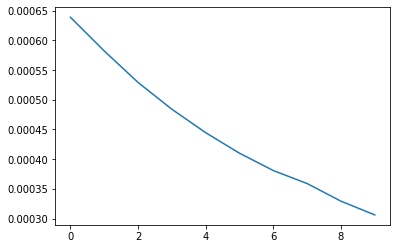

In [48]:
history = model.fit(X,Y.values,epochs=10)
loss = history.history['loss']
accuracy = history.history['mae']
epochs = range(len(history.history['loss']))
plt.plot(epochs,loss,label='validation_loss')
#plt.plot(epochs,accuracy,label='mae')

In [19]:
len(df[df['label']==0])

151

In [24]:
df = pd.read_csv("COUGHVID dataset/metadata_compiled.csv")

In [31]:
df['status'].unique()

array([nan, 'healthy', 'COVID-19', 'symptomatic'], dtype=object)

In [34]:
len(df[df['status']=='symptomatic'])

2590

# COUGHVID Dataset

importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import librosa
import csv
import tensorflow as tf
from tensorflow import keras

cleaning classification data

In [33]:
train_csv = pd.read_csv("COUGHVID dataset/metadata_compiled.csv")
df = train_csv[['uuid','age','gender','respiratory_condition','status']]

In [34]:
df = df.dropna(axis=0,how='any')

In [35]:
df['status'] = df['status'].map({'healthy':0,'symptomatic':1,'COVID-19':1})

In [41]:
LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])

In [47]:
LE = LabelEncoder()
df['respiratory_condition'] = LE.fit_transform(df['respiratory_condition'])

In [52]:
df.to_csv('classification_data.csv',index=False)

In [3]:
df = pd.read_csv('classificaton_data.csv')

usable files

In [5]:
files = []
for file in os.listdir('webm2wav') :
    files.append(file.split('.')[0])

14482

In [18]:
hashset = set(files)
for i in range(len(df)) :
    if df.iloc[i,:]['uuid'] not in hashset :
        df.iloc[i,-1] = None

In [27]:
df = df.dropna(axis=0,how='any')

In [33]:
df.to_csv('classification_data_updated.csv',index=False)

## Building Dataset

Extracting spectrograms from audio files

In [41]:
cmap = plt.get_cmap('inferno')
for i in range(len(df)) :
    source = df['uuid'][i]
    path = 'webm2wav/'+source+'.wav'
    y,sr = librosa.load(path, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    plt.savefig(f'spectrograms/{source.replace(".", "")}.png')

In [6]:
df = pd.read_csv('classification_data_updated.csv')
df

,uuid,age,gender,respiratory_condition,status
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,15.0,1,0,0.0
1,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,46.0,0,0,0.0
2,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,34.0,1,1,0.0
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,21.0,1,0,0.0
4,001e2f19-d81c-4029-b33c-d2db56b23a4a,20.0,1,1,0.0
...,...,...,...,...,...
14477,f3abf042-e22d-4e27-af5b-6650cc8f4883,16.0,1,0,0.0
14478,f3ad3b65-9cec-4cc5-847f-07430a264f9d,69.0,1,0,0.0
14479,f3aebde6-d1cb-4f8e-8a9d-5f09cc160055,35.0,1,0,0.0
14480,f3b512dd-ebb3-46f9-b418-1e4d9800bff2,31.0,0,0,0.0


In [ ]:
hashset = getSpectrogramFiles()
count = len(hashset)
cmap = plt.get_cmap('inferno')
for i in range(len(df)) :
    if df['uuid'][i] not in hashset and df['status'][i] == 1:  
        source = df['uuid'][i]
        path = 'webm2wav/'+source+'.wav'
        y,sr = librosa.load(path, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
        plt.axis('off')
        plt.savefig(f'spectrograms/{source.replace(".", "")}.png')
        count += 1
        print("files converted : ",count)

In [2]:
# gets the total number of files in the spectrograms folder
def getSpectrogramFiles() :
    files = []
    for file in os.listdir('spectrograms/') :
        files.append(file.split('.')[0])
    hashset = set(files)
    print("files found : ",len(hashset))
    return hashset

# gets the labels of the files in the spectrograms with df as classification_data_updated
def countLabels(df) :
    count0 =0
    count1 = 0
    for i in range(len(df)) :
        if df['status'][i] == 0 :
            count0 += 1
        else :
            count1 += 1
    print("Healthy : ",count0)
    print("Covid positive : ",count1)
    print("total files : ",(count0+count1))
    
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [4]:
hashset = getSpectrogramFiles()
countLabels(hashset)

files found :  1838


NameError: name 'df' is not defined

### Extracting Features and unifying data

In [3]:
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' age'
header += ' gender'
header += ' respiratory_condition'
header += ' uuid'
header += ' status'
header = header.split()
header

['chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'age',
 'gender',
 'respiratory_condition',
 'uuid',
 'status']

In [ ]:
df = pd.read_csv("classification_data_updated.csv")
file = open('unified_dataset.csv', 'a')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(len(df)) :
    source = df['uuid'][i]
    path = 'webm2wav/'+source+'.wav'
    y,sr = librosa.load(path, mono=True, duration=5)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += ' '+str(df['age'][i])
    to_append += ' '+str(df['gender'][i])
    to_append += ' '+str(df['respiratory_condition'][i])
    to_append += ' '+df['uuid'][i]
    to_append += ' '+str(df['status'][i])
    to_append = to_append.split()
    file = open('unified_dataset.csv', 'a')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append) 
    print("extracted files : ",(i+1))

# Neural Network Model Experimentation

In [3]:
df = pd.read_csv('unified_dataset.csv')
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age,gender,respiratory_condition,uuid,status
0,0.125799,0.018790,557.246888,541.449181,1236.613973,0.038685,-548.788940,23.606979,-5.905068,9.216256,...,-3.538264,1.217950,-2.029420,0.313303,-0.222275,15.0,1,0,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.0
1,0.418816,0.001655,2932.042041,2287.258342,5392.572021,0.322187,-701.705505,63.574074,6.485498,2.101877,...,-7.062682,1.838967,-3.643120,-3.821690,-1.129711,46.0,0,0,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,0.0
2,0.394565,0.097457,1841.552611,1863.271100,3799.444895,0.088711,-279.251099,101.417145,-26.392599,16.304626,...,-5.784528,-1.586974,-7.638764,-6.929610,-5.573641,34.0,1,1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.0
3,0.508658,0.051866,2905.802874,2060.310320,5379.263306,0.291334,-398.473663,51.205776,-56.377773,15.692808,...,-6.441534,7.364425,-4.945196,0.024016,-2.326225,21.0,1,0,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.0
4,0.090675,0.004550,265.456102,310.753467,539.426676,0.013830,-563.476257,13.822523,0.114156,5.914953,...,-2.185372,-1.310865,-0.790942,-0.715821,-0.834619,20.0,1,1,001e2f19-d81c-4029-b33c-d2db56b23a4a,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,0.512944,0.023030,3137.558994,2186.533578,5676.626587,0.268209,-484.073181,28.063210,-12.200029,10.437543,...,1.253925,-1.383177,0.233916,-0.477571,-2.084248,16.0,1,0,f3abf042-e22d-4e27-af5b-6650cc8f4883,0.0
14478,0.285275,0.010410,2098.124122,1878.304713,3930.258179,0.133199,-600.030029,63.579899,22.134485,18.594692,...,1.414832,-5.155683,-4.513929,-6.017869,-7.827081,69.0,1,0,f3ad3b65-9cec-4cc5-847f-07430a264f9d,0.0
14479,0.389768,0.016855,3141.166825,2614.720507,6443.711344,0.256569,-520.521912,4.831301,-3.302560,-1.760425,...,-0.769954,-1.085883,0.277529,-1.258130,1.418048,35.0,1,0,f3aebde6-d1cb-4f8e-8a9d-5f09cc160055,0.0
14480,0.418769,0.066166,2837.313551,1815.051664,4712.282308,0.254508,-334.125763,49.621655,-18.739819,25.851189,...,-5.658160,-1.373990,-4.224291,-3.982193,-1.760277,31.0,0,0,f3b512dd-ebb3-46f9-b418-1e4d9800bff2,0.0


In [7]:
df = df.drop(['uuid'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X = scaler.fit_transform(X)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Epoch 1/25
340/340 [==============================] - 2s 6ms/step - loss: 0.5267 - accuracy: 0.7669 - val_loss: 0.5188 - val_accuracy: 0.7722
Epoch 2/25
340/340 [==============================] - 2s 6ms/step - loss: 0.5157 - accuracy: 0.7691 - val_loss: 0.5147 - val_accuracy: 0.7686
Epoch 3/25
340/340 [==============================] - 2s 6ms/step - loss: 0.5086 - accuracy: 0.7735 - val_loss: 0.5240 - val_accuracy: 0.7724
Epoch 4/25
340/340 [==============================] - 2s 6ms/step - loss: 0.5047 - accuracy: 0.7727 - val_loss: 0.5184 - val_accuracy: 0.7727
Epoch 5/25
340/340 [==============================] - 2s 6ms/step - loss: 0.4981 - accuracy: 0.7783 - val_loss: 0.5254 - val_accuracy: 0.7572
Epoch 6/25
340/340 [==============================] - 2s 6ms/step - loss: 0.4903 - accuracy: 0.7804 - val_loss: 0.5242 - val_accuracy: 0.7655
Epoch 7/25
340/340 [==============================] - 2s 6ms/step - loss: 0.4814 - accuracy: 0.7832 - val_loss: 0.5319 - val_accuracy: 0.7545
Epoch 

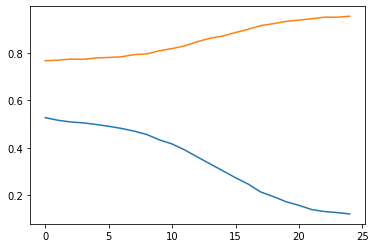

In [22]:
history = model.fit(X,Y,epochs=25,validation_split=0.25)
loss = history.history['loss']
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']
epochs = range(len(history.history['loss']))
plt.plot(epochs,validation_loss,label='validation_loss')
plt.plot(epochs,loss,label='validation_loss')



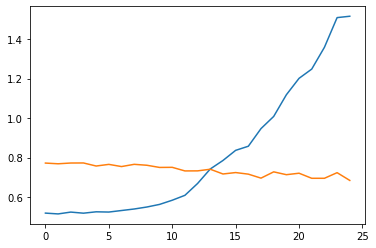

In [23]:
plt.plot(epochs,accuracy,label='accuracy')
plt.plot(epochs,validation_accuracy,label='accuracy')

overfitting observed required data balancing

balancing dataset

In [20]:
temp = df[df['status']==1]

In [21]:
temp.to_csv('balanced_dataset.csv',index=False)

In [26]:
temp = pd.read_csv('balanced_dataset.csv')
temp

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age,gender,respiratory_condition,uuid,status
0,0.489971,0.039586,2792.123120,2482.769139,5658.297729,0.257634,-439.692566,30.111332,-5.224643,-0.978038,...,1.240321,-3.770419,-0.059662,-2.784868,-2.710253,35.0,1,1,0029d048-898a-4c70-89c7-0815cdcf7391,1.0
1,0.289122,0.024398,1385.251246,958.280716,2264.525350,0.097557,-441.649384,88.303383,-33.005306,3.080904,...,-2.823315,-7.442374,-2.359970,-2.682710,-7.112940,31.0,0,1,00432f00-2477-4faf-a440-cc1276065b4a,1.0
2,0.331258,0.024953,1716.721914,1531.732793,3102.326457,0.094935,-423.451904,54.344971,-7.901043,-5.657348,...,0.738898,-0.269287,0.400496,-5.036016,-4.652656,28.0,1,1,006d8d1c-2bf6-46a6-8ef2-1823898a4733,1.0
3,0.479042,0.050747,2399.093787,1851.232571,4258.041382,0.210956,-383.333008,63.703320,-21.953117,-5.055672,...,-0.041269,-4.333345,-6.475228,-6.989185,-1.029777,33.0,0,0,006daa68-31b7-44ab-b0c6-7e5ef4e1ebf7,1.0
4,0.413464,0.056910,2717.013668,2090.809798,4781.667074,0.203751,-427.692200,23.080961,-16.937014,10.070471,...,0.176071,-4.728567,2.796361,1.148062,-0.640370,44.0,1,0,008c1c9e-aeef-40c5-846c-24f1b964f884,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,0.530465,0.031621,1442.714845,1609.091694,2951.833348,0.077318,-431.883636,70.188194,17.724348,12.678603,...,-4.923761,-1.381903,-1.277355,-3.611668,-1.525203,38.0,1,0,f361bb71-e176-4305-bae1-3d224b9de67c,1.0
3320,0.462757,0.060476,2229.568928,1694.038849,4080.601476,0.192930,-397.575867,52.073177,-13.498009,20.487303,...,-5.692223,-3.025316,-3.569655,-6.431392,-3.063924,22.0,0,0,f3771057-f3da-42dc-a9fd-435a0153f6b0,1.0
3321,0.524246,0.012107,3347.138337,2906.012840,6911.169964,0.217346,-524.423462,25.481228,3.663730,0.965559,...,-3.714602,-3.998355,-0.938382,-2.726841,-1.534533,37.0,0,0,f37cc139-33e9-4241-9b26-ec841b4750fd,1.0
3322,0.214004,0.044435,942.660201,745.011731,1708.799235,0.055196,-446.718903,24.420231,-10.886390,6.769658,...,-1.738985,0.717148,-1.000208,0.714368,-0.828980,58.0,1,0,f39de70f-ead0-44da-8729-053f1ad4e079,1.0


In [27]:
count = 0
for i in range(len(df)) :
    if count == 3324 :
        break
    if df['status'][i]==0 :
        temp.loc[len(temp)] = list(df.iloc[i,:])
        count += 1
        printProgressBar(count,3324,prefix="Files Added")

Files Added |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


In [31]:
countLabels(temp)

Healthy :  3324
Covid positive :  3324
total files :  6648


In [32]:
temp.to_csv('balanced_dataset.csv',index=False)

shuffling data in balanced dataset

In [43]:
df = pd.read_csv('balanced_dataset.csv')

In [39]:
df = np.random.shuffle(df.values)

In [44]:
df=df.sample(frac=1)

In [45]:
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age,gender,respiratory_condition,uuid,status
4971,0.416398,0.064312,2833.019009,1955.429455,4928.582223,0.276509,-392.143951,59.242245,-31.908358,15.053705,...,-5.397531,0.315546,-3.085782,-0.158739,-2.105011,58.0,1,0,23bfbae4-3a76-4e79-807b-7142310a68b0,0.0
4143,0.595845,0.000047,2693.211588,2030.244147,4933.346558,0.231436,-950.490906,46.812271,-26.053190,11.023696,...,-1.472725,-5.209379,0.899263,-3.494791,1.301062,32.0,1,0,1115cdf8-7aae-41f3-905b-55e0f540714f,0.0
2694,0.113293,0.042208,439.793056,344.248948,701.374308,0.027970,-448.895172,40.461922,-4.379556,1.235211,...,1.487115,0.453843,1.161216,2.588236,-0.047008,24.0,0,1,c54e2543-7e25-4a57-83fe-6b227220d00c,1.0
5003,0.328945,0.035892,1826.155960,1708.623665,3498.696899,0.109997,-429.799255,52.358028,-8.804577,3.953145,...,0.042541,-2.879284,-3.630634,-1.451237,-1.969316,39.0,0,1,248acb98-7a1b-4fa5-ae54-e18bfcb1a1da,0.0
94,0.467490,0.035526,1913.772784,1780.993138,3507.465154,0.143847,-451.387909,75.554482,-3.389040,5.516099,...,0.011028,-2.950085,-3.661176,-3.454705,-5.360589,32.0,1,1,08024f8a-88fb-4298-9656-04da97112ae6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,0.400310,0.049013,2292.683709,2248.728878,4568.079631,0.126585,-389.207092,44.819679,-0.581044,-0.301906,...,3.720683,-13.394288,-5.128507,-0.605215,0.698962,27.0,0,0,4069b357-75c2-4706-a9c8-d4e3b092fdae,0.0
6254,0.381673,0.011508,3492.248845,1988.022650,5614.882406,0.371091,-544.817932,23.690857,-17.650919,17.095289,...,-4.584680,1.251381,2.003406,-8.389971,-1.396768,30.0,0,1,3f195900-b845-4e5a-ae41-59915356a1e3,0.0
199,0.283724,0.079765,1585.984256,1333.245595,3040.119425,0.082748,-333.609741,55.560783,-45.036758,19.586666,...,-5.530974,1.703863,-2.935782,-3.155773,-0.549518,45.0,0,0,0ff8a246-cc95-42fe-8e5a-4243c274793e,1.0
1846,0.166808,0.042738,989.304111,724.297655,1741.896566,0.068873,-440.696106,26.858181,-10.642936,14.360041,...,-0.620956,-1.550912,-3.866262,-1.009131,0.117903,34.0,0,0,8874d16b-e1f0-424b-b478-d50a72dadcdb,1.0


In [46]:
df.to_csv('balanced_dataset.csv',index=False)

Sample model on balanced dataset

In [13]:
df = pd.read_csv('balanced_dataset.csv')
df = df.drop(['uuid'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X = scaler.fit_transform(X)
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Epoch 1/10
187/187 [==============================] - 1s 6ms/step - loss: 0.6777 - accuracy: 0.5765 - val_loss: 0.6381 - val_accuracy: 0.6376
Epoch 2/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6549 - accuracy: 0.6092 - val_loss: 0.6383 - val_accuracy: 0.6346
Epoch 3/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6486 - accuracy: 0.6154 - val_loss: 0.6380 - val_accuracy: 0.6346
Epoch 4/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6456 - accuracy: 0.6231 - val_loss: 0.6395 - val_accuracy: 0.6286
Epoch 5/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6423 - accuracy: 0.6313 - val_loss: 0.6378 - val_accuracy: 0.6391
Epoch 6/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6391 - accuracy: 0.6365 - val_loss: 0.6391 - val_accuracy: 0.6241
Epoch 7/10
187/187 [==============================] - 1s 5ms/step - loss: 0.6376 - accuracy: 0.6368 - val_loss: 0.6395 - val_accuracy: 0.6346
Epoch 

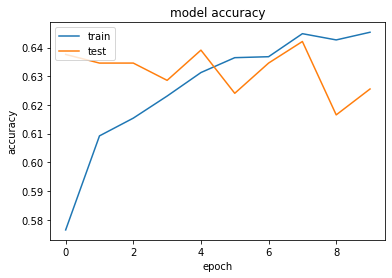

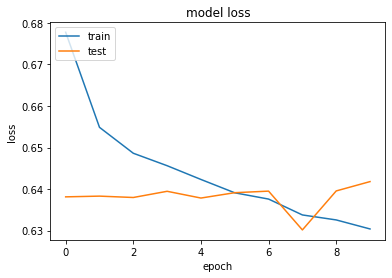

In [14]:
history = model.fit(X,Y.values,epochs=10,validation_split=0.1)
loss = history.history['loss']
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']
epochs = range(len(history.history['loss']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

no changes observed still overfitting

In [15]:
model.save('Models/model2.h5')